# IN_SYS - SW12 Exercise 2/1

## YOLO recognition of racoons

In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import numpy as np
from pathlib import Path
import requests

In [2]:
# Get the current folder
current_folder = Path().resolve()

# Combine the folder path with the yolo file name
file_name = 'yolo11s.pt'
file_path = current_folder / file_name

print(f"The full path to the file is: {file_path}")
# Load the YOLOv11 model
model = YOLO(file_path)

The full path to the file is: /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/yolo11s.pt


In [5]:
info = model.info()
print(info)

print(f"\nDetailed info:")
print(f"Model type: {type(model.model).__name__}")
print(f"Number of classes: {model.model.nc}")
print(f"Class names: {model.model.names}")

YOLO11s summary (fused): 100 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs
(100, 9443760, 0, 21.4717952)

Detailed info:
Model type: DetectionModel
Number of classes: 80
Class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'ca


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_1.jpg: 416x640 1 bear, 91.1ms
Speed: 3.1ms preprocess, 91.1ms inference, 6.7ms postprocess per image at shape (1, 3, 416, 640)


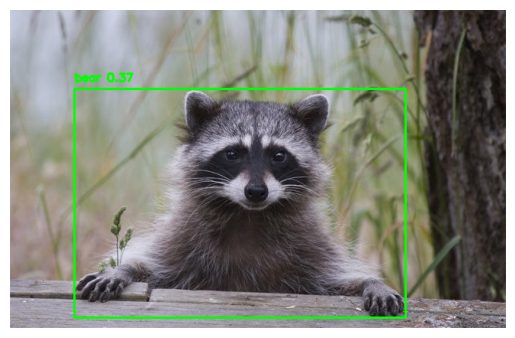


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_2.jpg: 480x640 1 cat, 1 potted plant, 91.1ms
Speed: 1.7ms preprocess, 91.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


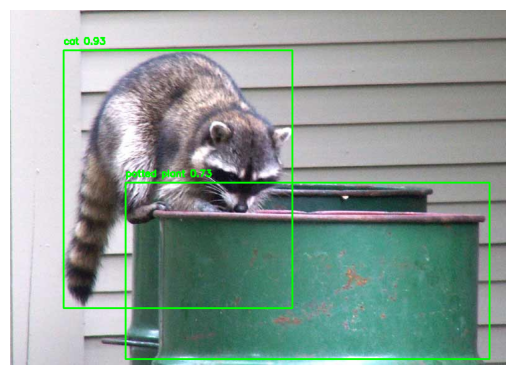


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_3.jpg: 448x640 1 cat, 82.8ms
Speed: 1.5ms preprocess, 82.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


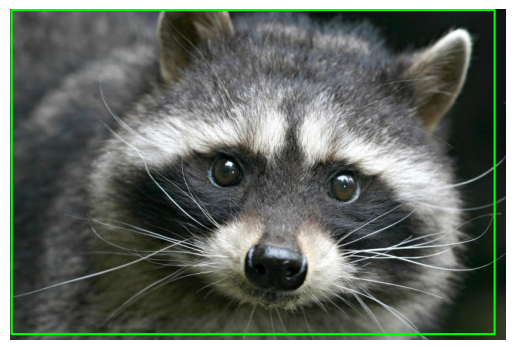


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_7.jpg: 512x640 1 cat, 1 bear, 88.6ms
Speed: 1.2ms preprocess, 88.6ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


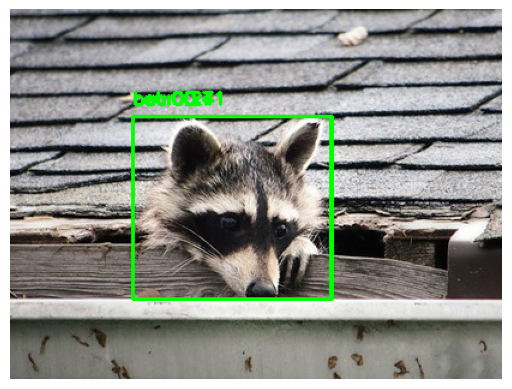


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_6.jpg: 480x640 1 cat, 3 bottles, 1 cup, 1 chair, 83.9ms
Speed: 1.4ms preprocess, 83.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


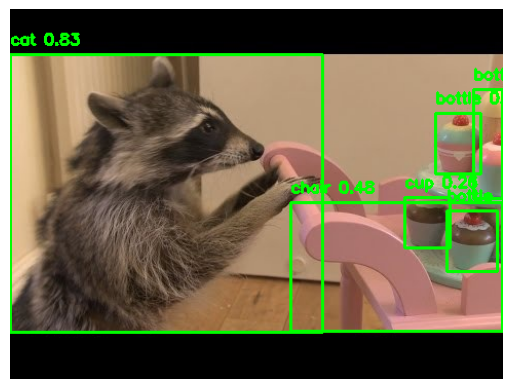


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_4.jpg: 448x640 1 bear, 1 apple, 75.4ms
Speed: 1.2ms preprocess, 75.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


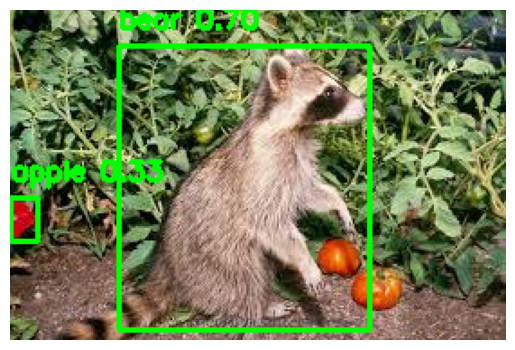


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_5.jpg: 448x640 (no detections), 96.3ms
Speed: 1.1ms preprocess, 96.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


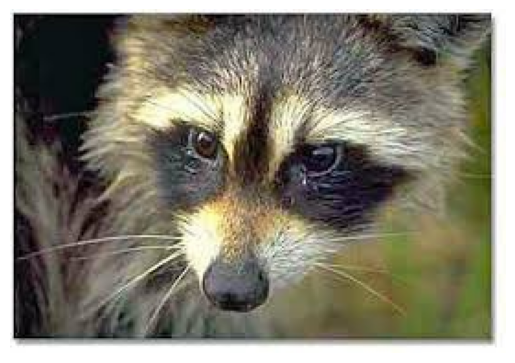

In [3]:
# Download and prepare sample raccoon images
sample_images = [
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-1.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-2.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-3.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-4.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-5.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-6.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-7.jpg",
]

# Save sample images locally
os.makedirs("raccoon_samples", exist_ok=True)
for idx, img_url in enumerate(sample_images):
    img_data = cv2.imdecode(
        np.frombuffer(requests.get(img_url).content, np.uint8), cv2.IMREAD_COLOR
    )
    img_path = f"raccoon_samples/raccoon_{idx+1}.jpg"
    cv2.imwrite(img_path, img_data)

# Function to display images with predictions
def display_image_with_predictions(img_path, predictions):
    img = cv2.imread(img_path)
    for box in predictions[0].boxes:  # Iterate over detected boxes
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = float(box.conf[0])  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]} {conf:.2f}"  # Class name and confidence

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw label
        cv2.putText(
            img, label, (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
        )

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run inference on each sample image
for img_path in os.listdir("raccoon_samples"):
    img_full_path = os.path.join("raccoon_samples", img_path)
    results = model(img_full_path)  # Run YOLOv8 inference
    display_image_with_predictions(img_full_path, results)